# Correlate topic mixtures from MixEHR with ventilation duration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import seaborn as sns
%matplotlib inline

## Read data

In [2]:
mixtures = pd.read_csv('/home/mcb/li_lab/zwen8/data/mimic/d2_phy_nurse_48/infer/infer_result.csv', header=None)
duration = pd.read_csv('/home/mcb/li_lab/zwen8/data/mimic/d2_phy_nurse_48/vent.txt', header=None, sep=' ')
duration = duration[1].astype(np.float64)

In [3]:
print(duration.shape)
print(mixtures.shape)

(7289,)
(7289, 50)


In [4]:
mixtures.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.370623,0.194906,5.276102,0.348726,0.287782,40.370226,4.321131,0.253114,28.585385,0.648867,...,23.497362,0.139191,0.396542,19.933494,0.330650,40.009483,39.129663,3.229883,0.107501,14.370463
1,0.720793,0.397904,22.838857,0.194343,0.248401,9.070775,0.151571,0.190460,0.347712,0.238685,...,0.476908,0.211895,0.095115,0.299895,0.125911,3.265872,63.192335,0.311834,2.544006,23.524916
2,0.082270,0.306322,1.775423,0.335247,0.258639,0.152633,0.039467,0.064208,8.470015,0.232681,...,0.222522,0.065769,0.040541,0.031881,0.096974,1.887761,11.758451,0.034853,0.163405,55.247264
3,0.116614,0.163569,20.760071,0.959721,1.216958,2.382869,0.082922,0.129344,0.190247,0.439190,...,7.887094,0.150346,0.128526,0.187408,0.134289,3.472641,45.142103,0.262518,79.710551,9.874938
4,0.374715,0.157828,0.761102,0.083880,0.131415,0.222197,1.377851,0.200101,0.304107,0.258439,...,132.446895,0.132357,0.139894,2.331493,0.078898,0.583116,3.138759,0.191520,0.165349,3.107429


In [5]:
duration.head()

0     83.733333
1    118.333333
2     82.666667
3    166.000000
4     91.500000
Name: 1, dtype: float64

## Normalize

In [6]:
normed_mixtures = pd.DataFrame(normalize(mixtures.iloc[:,2:51], norm='l1', axis=1))

In [7]:
mixtures.sum(axis=1)

0        290.0
1        193.0
2        125.0
3        269.0
4        232.0
         ...  
7284    1390.0
7285     389.0
7286    2918.0
7287    2462.0
7288    1465.0
Length: 7289, dtype: float64

## See if mixture's rows sum up to 1

In [8]:
normed_mixtures.sum(axis=1)

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
7284    1.0
7285    1.0
7286    1.0
7287    1.0
7288    1.0
Length: 7289, dtype: float64

## Heatmap

In [9]:
normed_mixtures.head()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0.018229,0.001205,0.000994,0.139480,0.014930,0.000875,0.098763,0.002242,0.018165,0.003874,...,0.081184,0.000481,0.001370,0.068870,0.001142,0.138233,0.135194,0.011159,0.000371,0.049650
1,0.119026,0.001013,0.001295,0.047273,0.000790,0.000993,0.001812,0.001244,0.013697,0.002431,...,0.002485,0.001104,0.000496,0.001563,0.000656,0.017020,0.329330,0.001625,0.013258,0.122601
2,0.014248,0.002690,0.002076,0.001225,0.000317,0.000515,0.067971,0.001867,0.147567,0.000433,...,0.001786,0.000528,0.000325,0.000256,0.000778,0.015149,0.094361,0.000280,0.001311,0.443356
3,0.077255,0.003571,0.004529,0.008867,0.000309,0.000481,0.000708,0.001634,0.085538,0.000906,...,0.029351,0.000559,0.000478,0.000697,0.000500,0.012923,0.167989,0.000977,0.296631,0.036748
4,0.003288,0.000362,0.000568,0.000960,0.005953,0.000864,0.001314,0.001117,0.001558,0.003519,...,0.572205,0.000572,0.000604,0.010073,0.000341,0.002519,0.013560,0.000827,0.000714,0.013425


In [10]:
sorted_normed_mixtures = normed_mixtures.sort_values(by=normed_mixtures.columns[17], ascending=False)

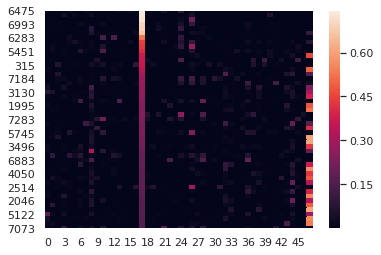

In [11]:
sns.set()
sns.heatmap(sorted_normed_mixtures.head(50))

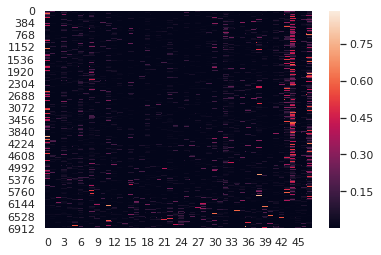

In [12]:
sns.heatmap(normed_mixtures)

## Compute correlation

In [13]:
corr = normed_mixtures.apply(lambda mixture: mixture.corr(duration, method='pearson'))

In [14]:
corr_sorted = corr.sort_values(ascending=False)

Text(0, 0.5, 'Pearson Correlation')

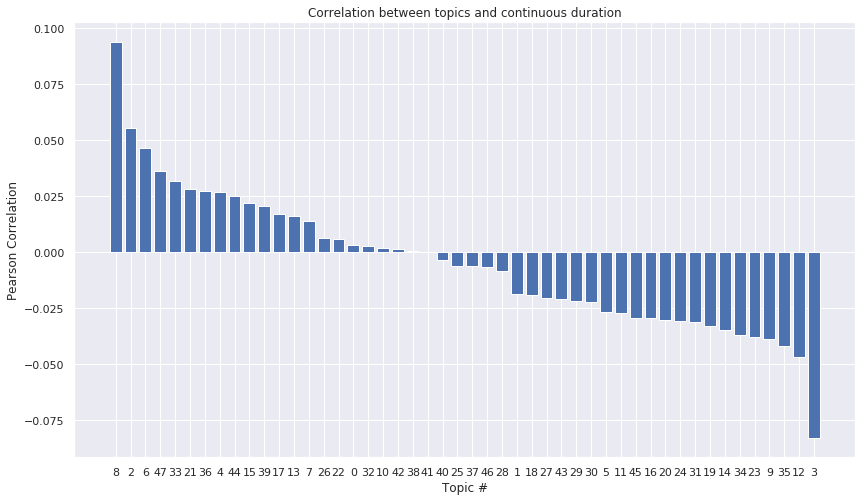

In [15]:
plt.figure(figsize=(14, 8))
plt.bar(x=range(len(corr)), height=corr_sorted)
plt.title('Correlation between topics and continuous duration')
plt.xlabel('Topic #')
plt.xticks(range(len(corr)), corr_sorted.index)
plt.ylabel('Pearson Correlation')

## Select most correlated topics and map back to words

In [16]:
def find_max_n(numbers, n=3):
    sorted_numbers = sorted(numbers, reverse=True)
    return [numbers.index(number) for number in sorted_numbers[0:n]]

In [17]:
top_pos = find_max_n(list(corr), 3)
top_neg = find_max_n(list(-corr), 3)

In [18]:
top_neg

[3, 12, 35]

In [19]:
top_topics = top_pos + top_neg
top_topics

[8, 2, 6, 3, 12, 35]

## Extract top words in those top topics

In [20]:
phis_df = pd.read_csv(r'/home/mcb/li_lab/zwen8/data/mimic/all_notes_nosws_train_mixehr/data_JCVB0_nmar_K50_iter632_phi_normalized.csv', header=None)

In [21]:
phis_df.columns = ['PLACE_HOLD', 'WORD_ID'] + [str(idx) for idx in range(50)]

In [22]:
phis_df.head()

,PLACE_HOLD,WORD_ID,0,1,2,3,4,5,6,7,...,40,41,42,43,44,45,46,47,48,49
0,1,0,2.943630e-04,2.311330e-04,2.998340e-04,3.388510e-05,6.940750e-05,1.150790e-04,7.746460e-05,3.662280e-06,...,6.816390e-06,4.609590e-04,1.630590e-06,6.305180e-06,7.401320e-06,2.688330e-04,1.824120e-04,4.655290e-06,2.748580e-06,9.546310e-06
1,1,1,6.437870e-07,5.297150e-07,5.176090e-07,1.357350e-06,6.418060e-07,7.217570e-07,6.900310e-07,1.180410e-06,...,5.796670e-07,7.362340e-07,7.633450e-07,1.181350e-06,7.530370e-07,6.320100e-07,2.631140e-07,7.327510e-07,5.722240e-07,5.404720e-07
2,1,2,2.656590e-07,4.004170e-07,3.668680e-06,5.311010e-07,5.004640e-07,1.305920e-06,4.025180e-07,7.069170e-07,...,2.636650e-06,2.892410e-07,2.834470e-07,6.649920e-07,4.865480e-07,9.333550e-06,6.381640e-06,4.353360e-07,4.892630e-07,6.182850e-06
3,1,3,1.464660e-07,2.504590e-07,2.122340e-05,2.746740e-07,2.831380e-07,2.695880e-07,2.228410e-07,3.840290e-07,...,2.099420e-07,1.523580e-07,1.654580e-07,3.080910e-07,2.823050e-07,6.430050e-06,2.065080e-07,2.627520e-07,2.277650e-07,3.020490e-07
4,1,4,5.943950e-07,5.397610e-07,1.583780e-06,5.358630e-07,1.111080e-04,6.104390e-07,1.012910e-06,3.449170e-05,...,3.851080e-07,1.773080e-05,3.219480e-07,5.630530e-07,5.493100e-07,4.164880e-07,1.869740e-07,1.863090e-05,5.747410e-07,4.141540e-07


In [23]:
cols = ['WORD_ID'] + [str(value) for value in top_topics]

In [24]:
top_phis_df = phis_df[cols]

In [25]:
top_phis_df.head()

,WORD_ID,8,2,6,3,12,35
0,0,5.506580e-06,2.998340e-04,7.746460e-05,3.388510e-05,1.807930e-05,1.935400e-04
1,1,9.920190e-07,5.176090e-07,6.900310e-07,1.357350e-06,1.110200e-06,4.103510e-07
2,2,7.709670e-07,3.668680e-06,4.025180e-07,5.311010e-07,5.703000e-06,5.220360e-07
3,3,4.843670e-07,2.122340e-05,2.228410e-07,2.746740e-07,3.491050e-07,1.800570e-07
4,4,5.307480e-07,1.583780e-06,1.012910e-06,5.358630e-07,4.009170e-06,2.953490e-07


In [26]:
vocab_df = pd.read_csv(r'/home/mcb/li_lab/zwen8/data/mimic/all_notes_nosws_train_mixehr/vocab.txt', header=None)

In [27]:
vocab_df.columns = ['WORD', 'WORD_ID']

In [28]:
vocab_df.head()

,WORD,WORD_ID
0,aa,0
1,aaa,1
2,aabg,2
3,aacute,3
4,aado,4


In [29]:
top_words_bytopic = [top_phis_df.sort_values(by=str(topic), ascending=False)['WORD_ID'][0:10] for topic in top_topics]
top_words = []
for sublist in top_words_bytopic:
    for word in sublist:
        top_words.append(word)

In [30]:
word_topic_matrix = top_phis_df.iloc[[word_id for word_id in top_words]]

In [31]:
word_topic_matrix.head()

,WORD_ID,8,2,6,3,12,35
12387,12387,0.039869,1.391810e-03,7.139120e-06,5.131880e-06,0.000228,1.294090e-06
13001,13001,0.036775,1.132470e-06,1.552580e-06,1.693780e-06,0.000002,5.106640e-07
5074,5074,0.034918,8.807090e-07,7.166860e-07,7.822950e-07,0.000001,4.580200e-07
6087,6087,0.017189,9.898180e-07,7.042720e-06,5.069950e-06,0.000009,8.449110e-07
24651,24651,0.012869,9.499490e-07,5.788580e-06,2.616840e-06,0.027527,6.589730e-07


In [32]:
yticklabels = [vocab_df[vocab_df['WORD_ID'] == word_id]['WORD'].values[0] for word_id in top_words]
# xticklabels = ['23(pos)', '8(pos)', '36(pos)', '42(neg)', '17(neg)', '16(neg)']
xticklabels = [str(topic) + '(pos)' for topic in top_topics[0:3]] + [str(topic) + '(neg)' for topic in top_topics[3:]]

Text(0.5, 1, 'top words heatmap, pearson correlation with continuous duration')

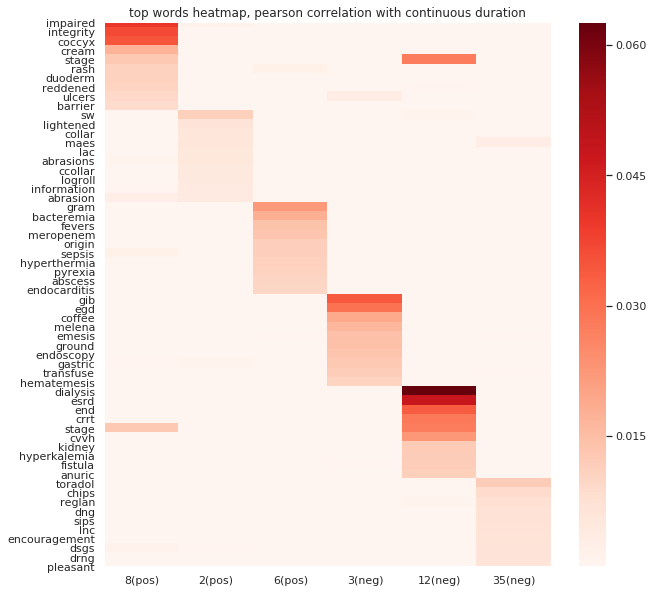

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(word_topic_matrix.iloc[:, 1:], yticklabels=yticklabels, xticklabels=xticklabels, cmap='Reds')
plt.title('top words heatmap, pearson correlation with continuous duration')

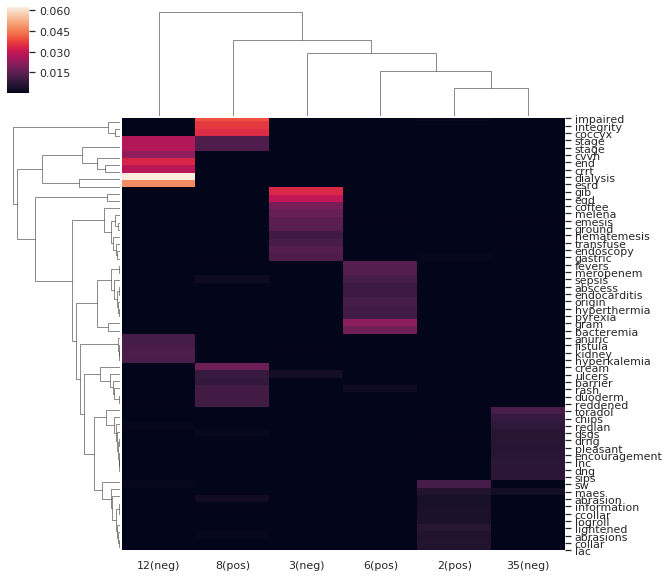

In [34]:
sns.set()
sns.clustermap(word_topic_matrix.iloc[:, 1:], yticklabels=yticklabels, xticklabels=xticklabels)

### Output entire heatmap

In [43]:
entire_top_words_bytopic = [phis_df.sort_values(by=str(topic), ascending=False)['WORD_ID'][0:25] for topic in range(50)]
entire_top_words = []
for sublist in entire_top_words_bytopic:
    for word in sublist:
        entire_top_words.append(word)

In [44]:
entire_word_topic_matrix = phis_df.iloc[[word_id for word_id in entire_top_words]]

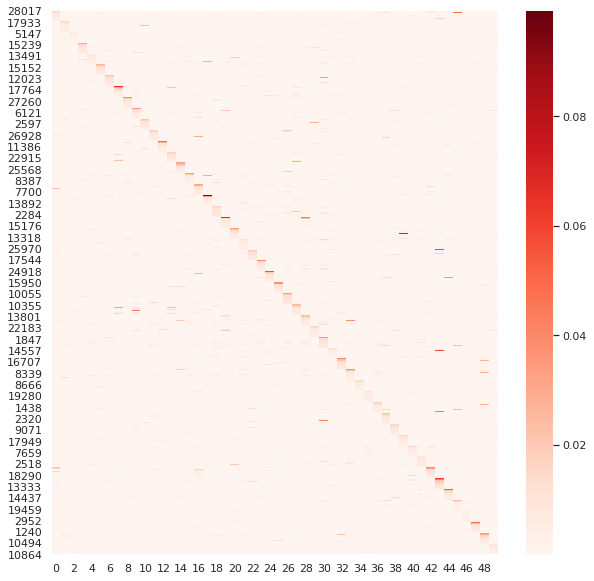

In [45]:
plt.figure(figsize=(10,10))
sns.heatmap(entire_word_topic_matrix.iloc[:, 2:], cmap='Reds')

## Binary duration
Threshold at 7 day

In [394]:
binary_duration = (duration > 7 * 24).astype(int)

In [395]:
bi_corr = normed_mixtures.apply(lambda mixture: mixture.corr(binary_duration, method='pearson'))

In [396]:
bi_corr_sorted = bi_corr.sort_values(ascending=False)

Text(0, 0.5, 'Pearson Correlation')

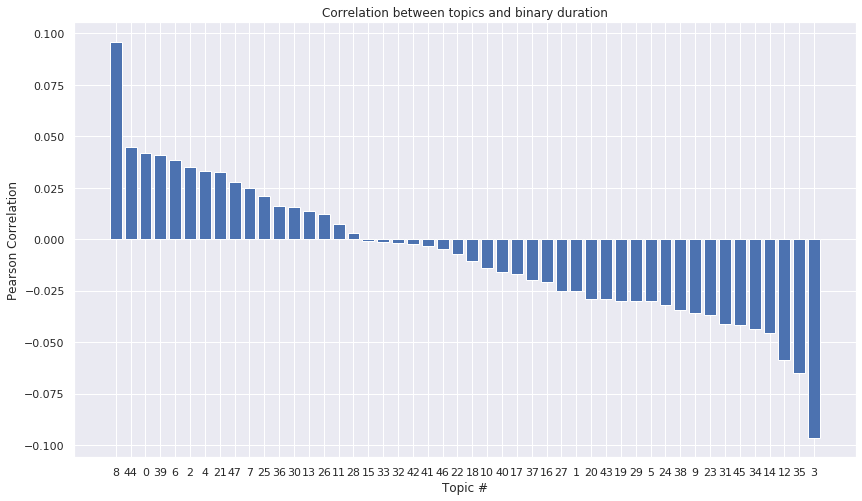

In [397]:
plt.figure(figsize=(14,8))
plt.bar(x=range(len(bi_corr)), height=bi_corr_sorted)
plt.title('Correlation between topics and binary duration')
plt.xlabel('Topic #')
plt.xticks(range(len(bi_corr)), bi_corr_sorted.index)
plt.ylabel('Pearson Correlation')

## Select most correlated topics and map back to words

In [398]:
bi_top_topics = find_max_n(list(np.abs(bi_corr)), 6)

In [399]:
bi_top_pos = find_max_n(list(bi_corr), 3)
bi_top_neg = find_max_n(list(-bi_corr), 3)

In [400]:
bi_top_topics = bi_top_pos + bi_top_neg
bi_top_topics

[8, 44, 0, 3, 35, 12]

## Extract top words in those top topics

In [401]:
bi_cols = ['WORD_ID'] + [str(value) for value in bi_top_topics]

In [402]:
bi_top_phis_df = phis_df[bi_cols]

In [403]:
bi_top_phis_df.head()

,WORD_ID,8,44,0,3,35,12
0,0,5.506580e-06,7.401320e-06,2.943630e-04,3.388510e-05,1.935400e-04,1.807930e-05
1,1,9.920190e-07,7.530370e-07,6.437870e-07,1.357350e-06,4.103510e-07,1.110200e-06
2,2,7.709670e-07,4.865480e-07,2.656590e-07,5.311010e-07,5.220360e-07,5.703000e-06
3,3,4.843670e-07,2.823050e-07,1.464660e-07,2.746740e-07,1.800570e-07,3.491050e-07
4,4,5.307480e-07,5.493100e-07,5.943950e-07,5.358630e-07,2.953490e-07,4.009170e-06


In [404]:
vocab_df = pd.read_csv(r'/home/mcb/li_lab/zwen8/data/mimic/all_notes_nosws_train_mixehr/vocab.txt', header=None)

In [405]:
vocab_df.columns = ['WORD', 'WORD_ID']

In [406]:
vocab_df.head()

,WORD,WORD_ID
0,aa,0
1,aaa,1
2,aabg,2
3,aacute,3
4,aado,4


In [407]:
bi_top_words_bytopic = [bi_top_phis_df.sort_values(by=str(topic), ascending=False)['WORD_ID'][0:10] for topic in bi_top_topics]
bi_top_words = []
for sublist in bi_top_words_bytopic:
    for word in sublist:
        bi_top_words.append(word)

In [408]:
bi_word_topic_matrix = bi_top_phis_df.iloc[[word_id for word_id in bi_top_words]]

In [409]:
bi_word_topic_matrix.head()

,WORD_ID,8,44,0,3,35,12
12387,12387,0.039869,6.860290e-06,3.583510e-04,5.131880e-06,1.294090e-06,0.000228
13001,13001,0.036775,1.692190e-06,9.176590e-06,1.693780e-06,5.106640e-07,0.000002
5074,5074,0.034918,9.016190e-07,5.566650e-07,7.822950e-07,4.580200e-07,0.000001
6087,6087,0.017189,1.263580e-05,8.556770e-05,5.069950e-06,8.449110e-07,0.000009
24651,24651,0.012869,5.359410e-06,3.358360e-06,2.616840e-06,6.589730e-07,0.027527


In [410]:
vocab_df.shape

(29689, 2)

In [411]:
bi_yticklabels = [vocab_df[vocab_df['WORD_ID'] == word_id]['WORD'].values[0] for word_id in bi_top_words]
bi_xticklabels = [str(topic) + '(pos)' for topic in bi_top_topics[0:3]] + [str(topic) + '(neg)' for topic in bi_top_topics[3:]]

Text(0.5, 1, 'top words heatmap, pearson correlation with binarized duration')

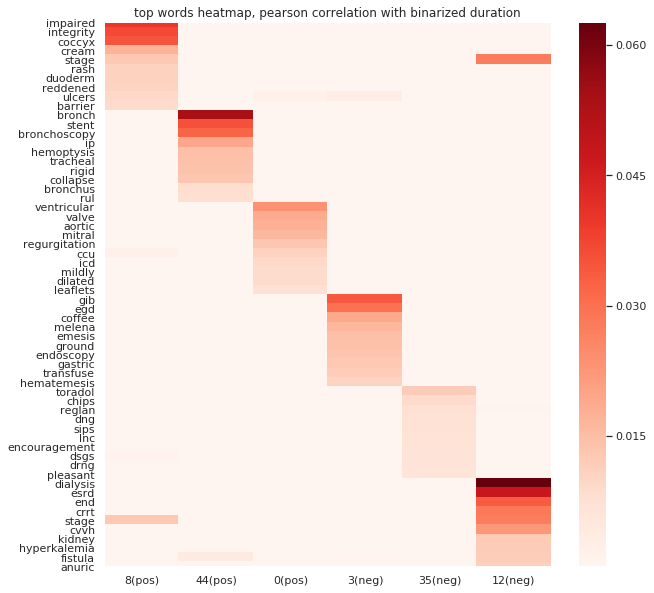

In [412]:
plt.figure(figsize=(10,10))
sns.heatmap(bi_word_topic_matrix.iloc[:, 1:], yticklabels=bi_yticklabels, xticklabels=bi_xticklabels, cmap='Reds')
plt.title('top words heatmap, pearson correlation with binarized duration')

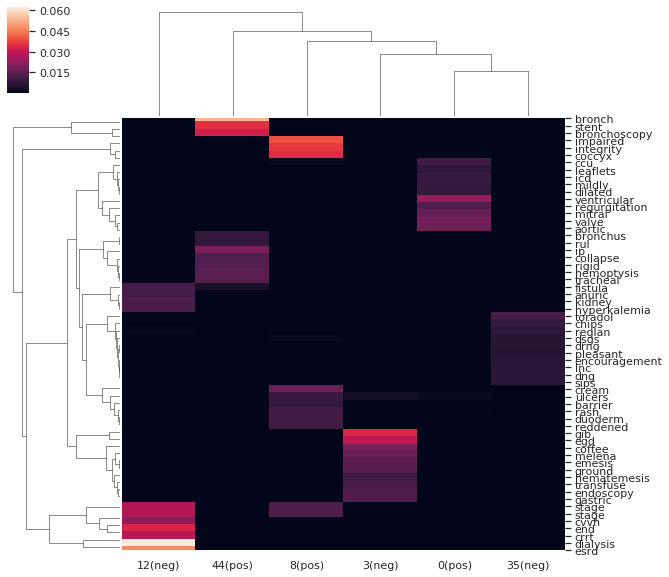

In [413]:
sns.set()
sns.clustermap(bi_word_topic_matrix.iloc[:, 1:], yticklabels=bi_yticklabels, xticklabels=bi_xticklabels)

### Ouput entire heatmap

## Try using cosine similarity instead of Pearson correlation
Because the correlation might not be linear

In [414]:
def cosine(series_1, series_2):
    return np.dot(series_1, series_2) / (np.linalg.norm(series_1, ord=2) * np.linalg.norm(series_2, ord=2))

In [415]:
cos = normed_mixtures.corrwith(duration, method=cosine)

In [416]:
cos.shape

(48,)

In [417]:
duration.shape

(7289,)

In [418]:
cos_sorted = cos.sort_values(ascending=False)

Text(0, 0.5, 'Cosine Similarity')

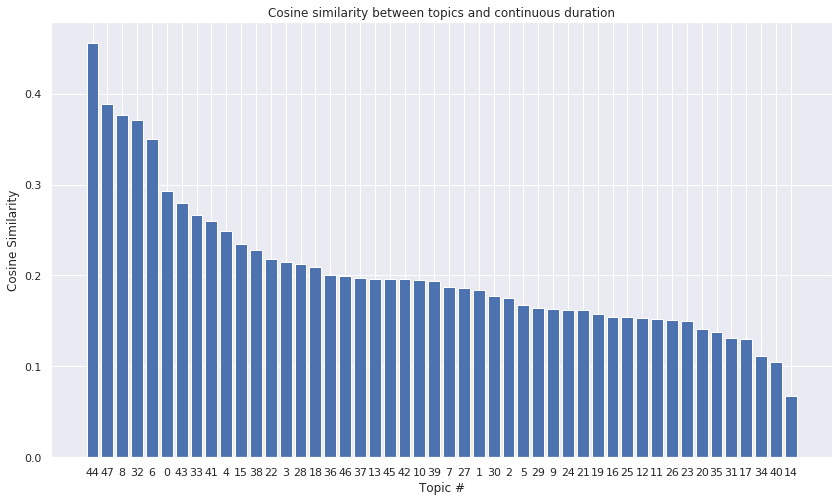

In [419]:
plt.figure(figsize=(14, 8))
plt.bar(x=range(len(cos_sorted)), height=cos_sorted)
plt.title('Cosine similarity between topics and continuous duration')
plt.xlabel('Topic #')
plt.xticks(range(len(cos_sorted)), cos_sorted.index)
plt.ylabel('Cosine Similarity')

## Select most correlated topics and map back to words

In [420]:
def find_max_n(numbers, n=3):
    sorted_numbers = sorted(numbers, reverse=True)
    return [numbers.index(number) for number in sorted_numbers[0:n]]

In [421]:
cos_top_topics = find_max_n(list(cos), 6)

## Extract top words in those top topics

In [422]:
cos_cols = ['WORD_ID'] + [str(value) for value in cos_top_topics]

In [423]:
cos_top_phis_df = phis_df[cos_cols]

In [424]:
cos_top_phis_df.head()

,WORD_ID,44,47,8,32,6,0
0,0,7.401320e-06,4.655290e-06,5.506580e-06,1.357530e-06,7.746460e-05,2.943630e-04
1,1,7.530370e-07,7.327510e-07,9.920190e-07,5.233530e-07,6.900310e-07,6.437870e-07
2,2,4.865480e-07,4.353360e-07,7.709670e-07,3.082740e-07,4.025180e-07,2.656590e-07
3,3,2.823050e-07,2.627520e-07,4.843670e-07,1.850250e-07,2.228410e-07,1.464660e-07
4,4,5.493100e-07,1.863090e-05,5.307480e-07,3.763070e-07,1.012910e-06,5.943950e-07


In [425]:
cos_top_words_bytopic = [cos_top_phis_df.sort_values(by=str(topic), ascending=False)['WORD_ID'][0:10] for topic in cos_top_topics]
cos_top_words = []
for sublist in cos_top_words_bytopic:
    for word in sublist:
        cos_top_words.append(word)

In [426]:
cos_word_topic_matrix = cos_top_phis_df.iloc[[word_id for word_id in cos_top_words]]

In [427]:
cos_word_topic_matrix.head()

,WORD_ID,44,47,8,32,6,0
3499,3499,0.053852,8.830960e-07,1.469510e-06,5.736510e-07,1.311310e-06,4.444080e-07
24800,24800,0.035576,3.293610e-06,1.596570e-06,1.054930e-06,1.350910e-06,1.061710e-06
3527,3527,0.032479,1.887420e-06,8.230590e-06,6.362320e-07,1.311710e-06,5.411520e-07
13312,13312,0.019469,1.321060e-06,1.122410e-06,6.539250e-07,5.373950e-05,6.555130e-07
11460,11460,0.014667,1.093180e-06,7.989200e-07,4.948770e-07,6.786630e-07,2.252710e-04


In [428]:
cos_yticklabels = [vocab_df[vocab_df['WORD_ID'] == word_id]['WORD'].values[0] for word_id in cos_top_words]
cos_xticklabels = [str(topic) for topic in cos_top_topics]

Text(0.5, 1, 'top words heatmap, cosine similarity with continuous duration')

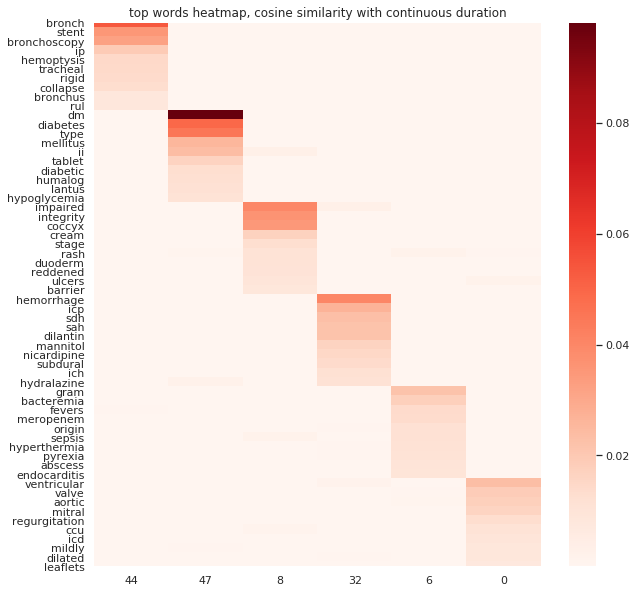

In [429]:
plt.figure(figsize=(10,10))
sns.heatmap(cos_word_topic_matrix.iloc[:, 1:], yticklabels=cos_yticklabels, xticklabels=cos_xticklabels, cmap='Reds')
plt.title('top words heatmap, cosine similarity with continuous duration')

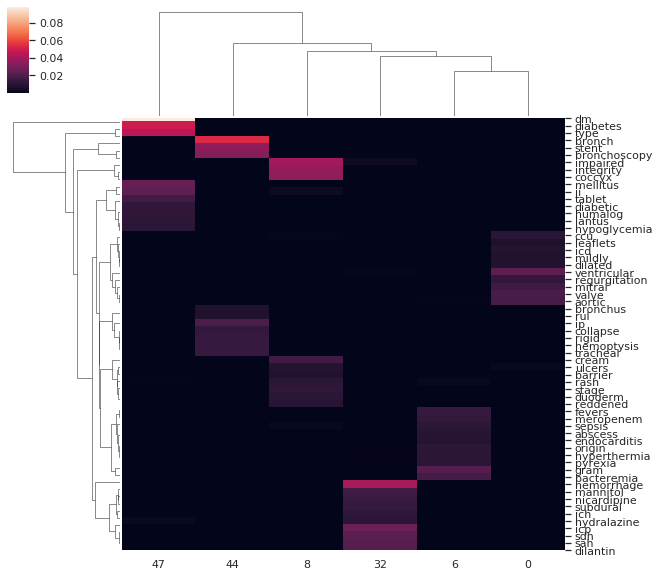

In [430]:
sns.set()
sns.clustermap(cos_word_topic_matrix.iloc[:, 1:], yticklabels=cos_yticklabels, xticklabels=cos_xticklabels)

### Try binarized

In [431]:
bi_cos = normed_mixtures.apply(lambda mixture: mixture.corr(binary_duration, method=inner_prod))

In [432]:
bi_cos_sorted = bi_cos.sort_values(ascending=False)

Text(0, 0.5, 'Cosine Similarity')

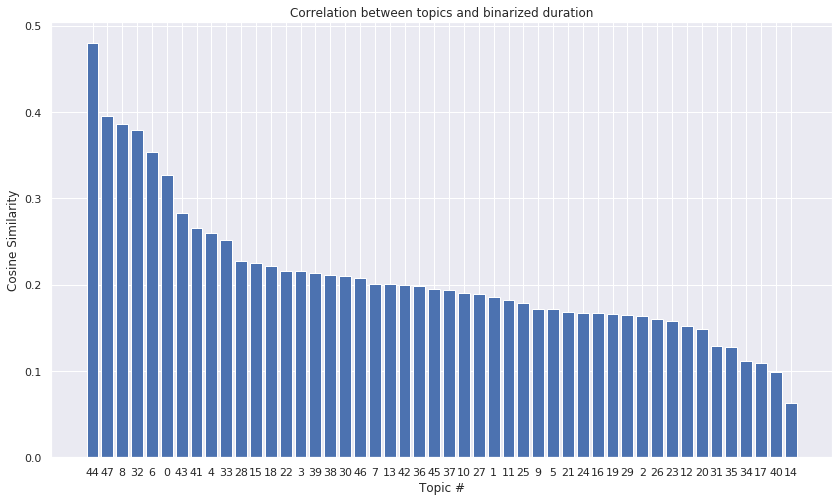

In [433]:
plt.figure(figsize=(14, 8))
plt.bar(x=range(len(bi_cos_sorted)), height=bi_cos_sorted)
plt.title('Correlation between topics and binarized duration')
plt.xlabel('Topic #')
plt.xticks(range(len(bi_cos_sorted)), bi_cos_sorted.index)
plt.ylabel('Cosine Similarity')

## Select most correlated topics and map back to words

In [434]:
bi_cos_top_topics = find_max_n(list(bi_cos), 6)

## Extract top words in those top topics

In [435]:
bi_cos_cols = ['WORD_ID'] + [str(value) for value in bi_cos_top_topics]

In [436]:
bi_cos_top_phis_df = phis_df[bi_cos_cols]

In [437]:
bi_cos_top_phis_df.head()

,WORD_ID,44,47,8,32,6,0
0,0,7.401320e-06,4.655290e-06,5.506580e-06,1.357530e-06,7.746460e-05,2.943630e-04
1,1,7.530370e-07,7.327510e-07,9.920190e-07,5.233530e-07,6.900310e-07,6.437870e-07
2,2,4.865480e-07,4.353360e-07,7.709670e-07,3.082740e-07,4.025180e-07,2.656590e-07
3,3,2.823050e-07,2.627520e-07,4.843670e-07,1.850250e-07,2.228410e-07,1.464660e-07
4,4,5.493100e-07,1.863090e-05,5.307480e-07,3.763070e-07,1.012910e-06,5.943950e-07


In [438]:
# bi_cos_top_phis_df.sort_values(by='21', ascending=False)

In [439]:
bi_cos_top_words_bytopic = [bi_cos_top_phis_df.sort_values(by=str(topic), ascending=False)['WORD_ID'][0:10] for topic in bi_cos_top_topics]
bi_cos_top_words = []
for sublist in bi_cos_top_words_bytopic:
    for word in sublist:
        bi_cos_top_words.append(word)

In [440]:
bi_cos_word_topic_matrix = bi_cos_top_phis_df.iloc[[word_id for word_id in bi_cos_top_words]]

In [441]:
bi_cos_word_topic_matrix.head()

,WORD_ID,44,47,8,32,6,0
3499,3499,0.053852,8.830960e-07,1.469510e-06,5.736510e-07,1.311310e-06,4.444080e-07
24800,24800,0.035576,3.293610e-06,1.596570e-06,1.054930e-06,1.350910e-06,1.061710e-06
3527,3527,0.032479,1.887420e-06,8.230590e-06,6.362320e-07,1.311710e-06,5.411520e-07
13312,13312,0.019469,1.321060e-06,1.122410e-06,6.539250e-07,5.373950e-05,6.555130e-07
11460,11460,0.014667,1.093180e-06,7.989200e-07,4.948770e-07,6.786630e-07,2.252710e-04


In [442]:
bi_cos_yticklabels = [vocab_df[vocab_df['WORD_ID'] == word_id]['WORD'].values[0] for word_id in bi_cos_top_words]
bi_cos_xticklabels = [str(topic) for topic in bi_cos_top_topics]

Text(0.5, 1, 'top words heatmap, cosine similarity with binarized duration')

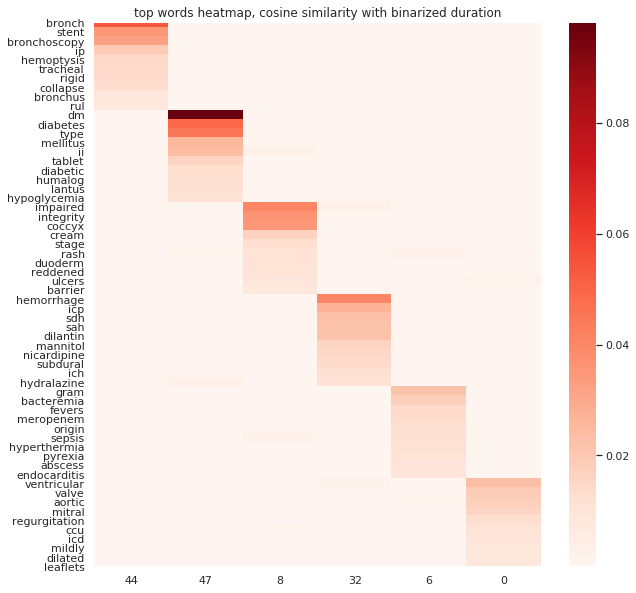

In [443]:
plt.figure(figsize=(10,10))
sns.heatmap(bi_cos_word_topic_matrix.iloc[:, 1:], yticklabels=bi_cos_yticklabels, xticklabels=bi_cos_xticklabels, cmap='Reds')
plt.title('top words heatmap, cosine similarity with binarized duration')

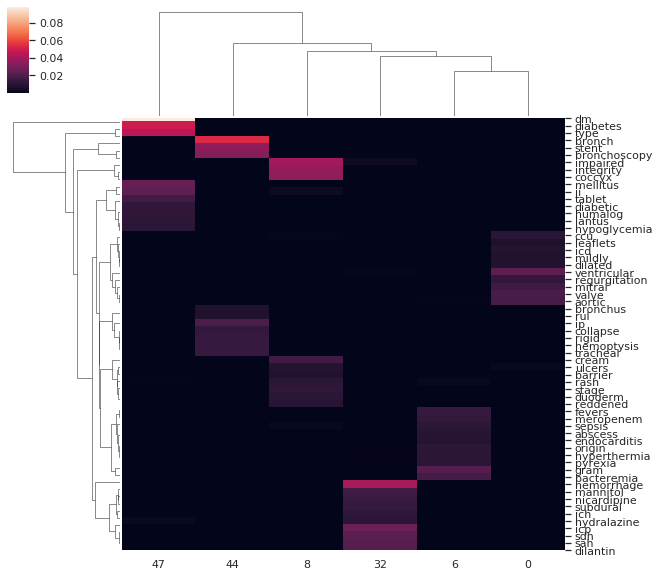

In [444]:
sns.set()
sns.clustermap(bi_cos_word_topic_matrix.iloc[:, 1:], yticklabels=bi_cos_yticklabels, xticklabels=bi_cos_xticklabels)